In [1]:
import tensorflow
tensorflow.__version__

'2.1.0'

In [2]:
import random
random.seed(0)

In [3]:
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

Label:9


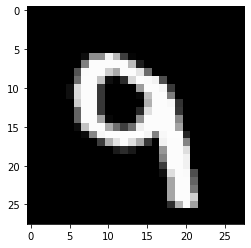

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label:{}".format(y_train[20001]))
plt.imshow(X_train[20001],cmap='gray')

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [16]:
#Format:(n_e,n_h,n_w,n_channel)
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [20]:
X_train.astype('float32')
X_test.astype('float32')
X_train=X_train/255
X_test=X_test/255

In [23]:
print(X_train.shape)
print(X_test.shape)
print('Min Value in X_train:{}'.format(X_train.min()))
print('Max Value in X_train:{}'.format(X_train.max()))

(60000, 28, 28, 1)
(10000, 28, 28, 1)
Min Value in X_train:0.0
Max Value in X_train:1.0


In [25]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)
print(y_train.shape)
print(y_train[0])

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [33]:
#Model
#28x28->128-relu->10-softmax->Probability
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
model=Sequential()
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [34]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='sgd')
model.fit(x=X_train,y=y_train,batch_size=32,epochs=10,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.6567 - accuracy: 0.8339 - val_loss: 0.3572 - val_accuracy: 0.9036
Epoch 2/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3372 - accuracy: 0.9065 - val_loss: 0.2958 - val_accuracy: 0.9186
Epoch 3/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2898 - accuracy: 0.9180 - val_loss: 0.2611 - val_accuracy: 0.9266
Epoch 4/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2603 - accuracy: 0.9271 - val_loss: 0.2389 - val_accuracy: 0.9319
Epoch 5/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2383 - accuracy: 0.9333 - val_loss: 0.2228 - val_accuracy: 0.9358
Epoch 6/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2201 - accuracy: 0.9379 - val_loss: 0.2067 - val_accuracy: 0.9395
Epoch 7/10
60000/60000 [==============================] 